In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.tests.test_markov_regression import fedfunds, ogap
from markov_switch import MarkovSwitch

# 1. ogap data testing

### a. check ogap data

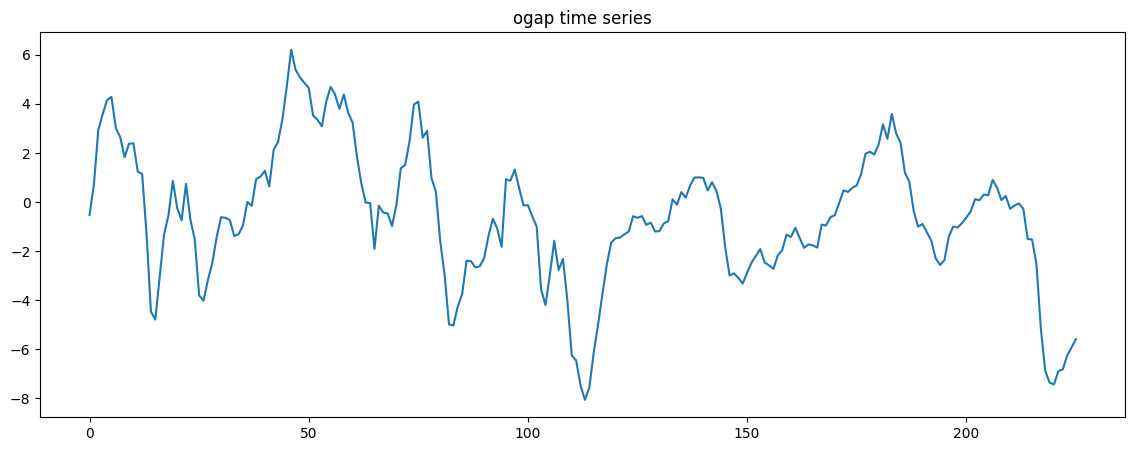

In [11]:
# test with ogap data
np.set_printoptions(suppress=True)
plt.figure(figsize=(14,5))
plt.title("ogap time series")
plt.plot(ogap)
plt.show()

### b. train on ogap and plot result

c:\Users\SamSung\Desktop\pers_research\quant_stuff\quant-learn\machine-learning\markov_models\markov_switch.py:40: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.em_params = pd.Series([])


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.1776560443001847
            Iterations: 10
            Function evaluations: 61
            Gradient evaluations: 10


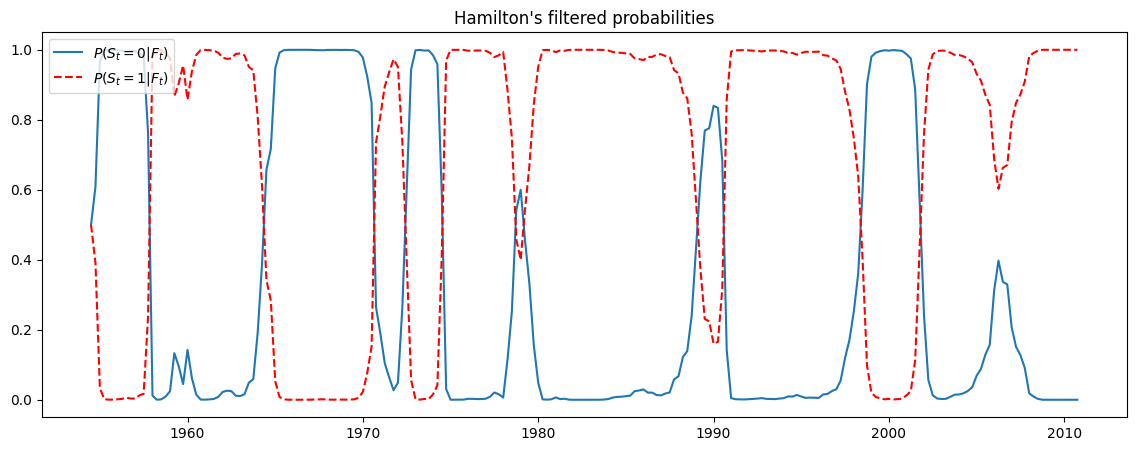

In [17]:
msm = MarkovSwitch()
msm.fit(np.array(ogap, dtype=np.float64))

plt.figure(figsize=(14,5))
plt.title("Hamilton's filtered probabilities")
dates = pd.date_range('1954-07-01', '2010-10-01', freq='QS')
plt.plot(dates, msm.filtered_p[:,0], label="$P(S_t = 0 | F_t)$")
plt.plot(dates, msm.filtered_p[:,1], label="$P(S_t = 1 | F_t)$", color='r', linestyle='--')
plt.legend(loc='upper left') # displays labels
plt.show()

### c. check smoothed probability

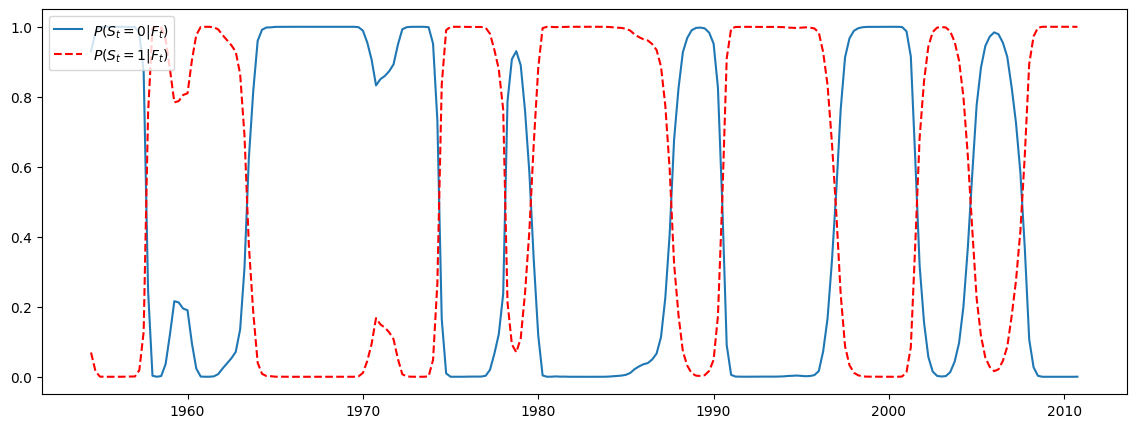

In [15]:
plt.figure(figsize=(14,5))
plt.title("Kim's smoothed probabilities")
dates = pd.date_range('1954-07-01', '2010-10-01', freq='QS')
plt.plot(dates, msm.smoothed_p[:,0], label="$P(S_t = 0 | F_t)$")
plt.plot(dates, msm.smoothed_p[:,1], label="$P(S_t = 1 | F_t)$", color='r', linestyle='--')
plt.legend(loc='upper left') # displays labels
plt.show()

C:\Users\SamSung\AppData\Local\Temp\ipykernel_24136\20382839.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


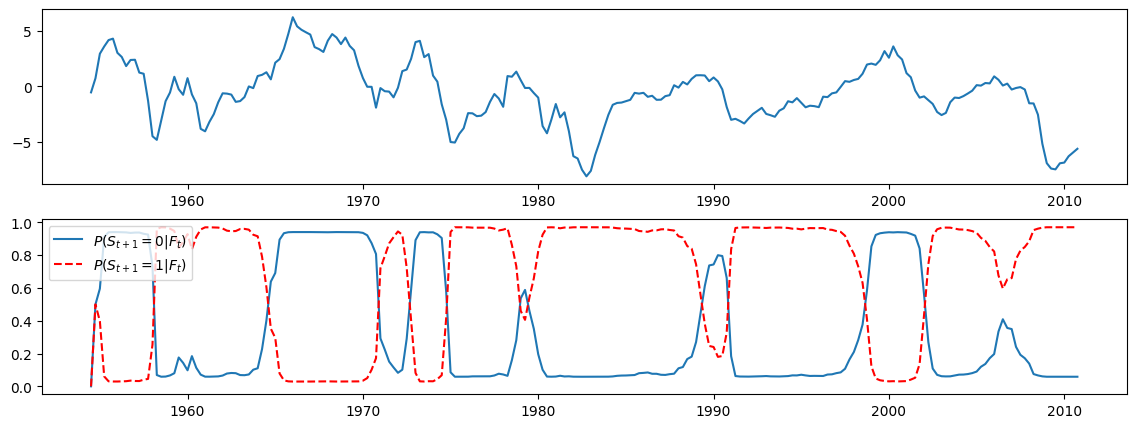

In [19]:
plt.figure(figsize=(14,5))
plt.title("predicted probabilities")
dates = pd.date_range('1954-07-01', '2010-10-01', freq='QS')

plt.subplot(211)
plt.plot(dates, ogap)

plt.subplot(212)
plt.plot(dates, msm.pred_p[:,0], label="$P(S_{t+1} = 0 | F_t)$")
plt.plot(dates, msm.pred_p[:,1], label="$P(S_{t+1} = 1 | F_t)$", color='r', linestyle='--')
plt.legend(loc='upper left') # displays labels
plt.show()

In [20]:
msm.em_params

,p11,p22,regime1_mean,regime2_mean,regime_vol
em_iters,,,,,
0,0.500000,0.500000,2.393386,0.804271,1.000000
1,0.709484,0.919636,2.837864,-1.548602,2.076288
2,0.886900,0.965947,2.714245,-1.703619,1.979379
3,0.920463,0.976703,2.649792,-1.758498,1.952488
4,0.925376,0.978224,2.624246,-1.770341,1.950407
5,0.926104,0.978326,2.612241,-1.774932,1.950280
6,0.926195,0.978249,2.605151,-1.777713,1.950162
7,0.926190,0.978169,2.600455,-1.779604,1.950049
8,0.926174,0.978109,2.597208,-1.780926,1.949963


# 2. fedfunds testing

### a. check fedfunds data

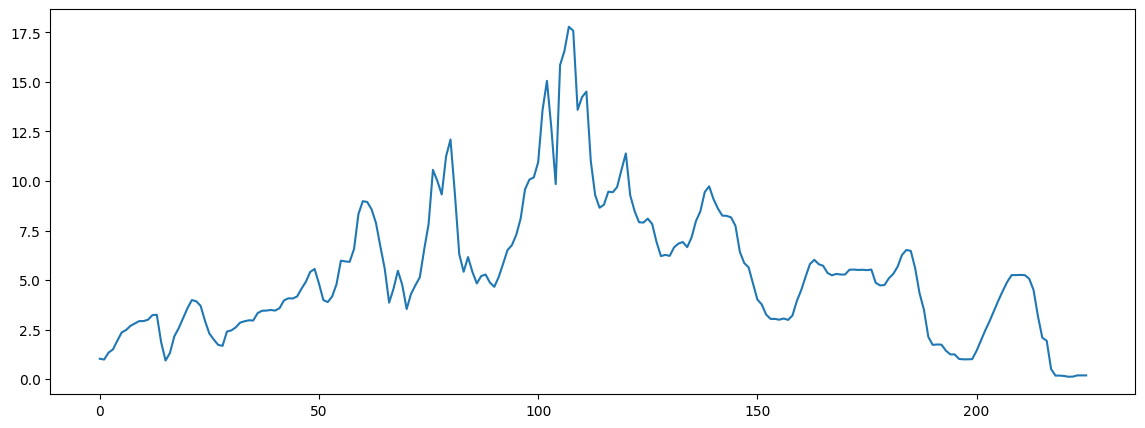

In [13]:
plt.figure(figsize=(14,5))
plt.plot(fedfunds)
plt.show()

### b. train on fedfunds and show results

c:\Users\SamSung\Desktop\pers_research\quant_stuff\quant-learn\machine-learning\markov_models\markov_switch.py:40: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.em_params = pd.Series([])


Optimization terminated successfully    (Exit mode 0)
            Current function value: 2.2511371684899646
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6


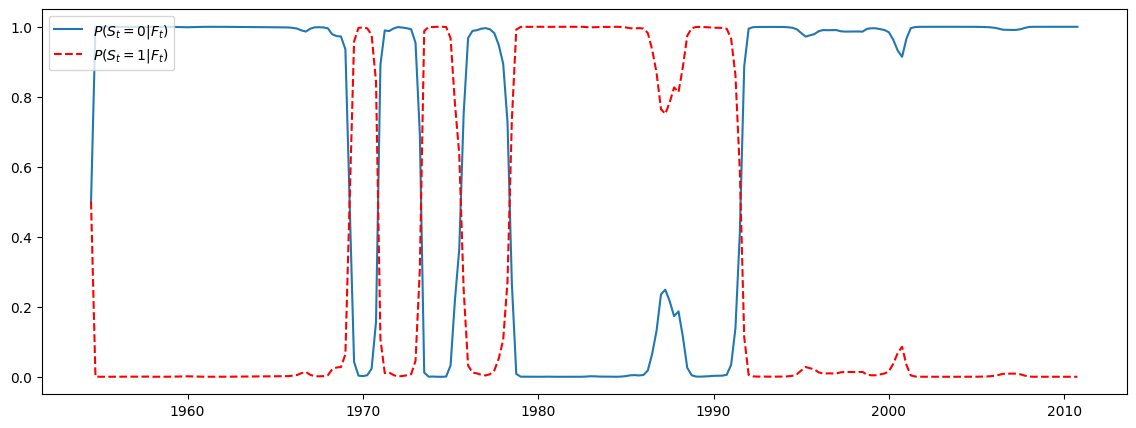

In [14]:
msm2 = MarkovSwitch()
msm2.fit(np.array(fedfunds))

plt.figure(figsize=(14,5))
dates = pd.date_range('1954-07-01', '2010-10-01', freq='QS')
plt.plot(dates, msm2.filtered_p[:,0], label="$P(S_t = 0 | F_t)$")
plt.plot(dates, msm2.filtered_p[:,1], label="$P(S_t = 1 | F_t)$", color='r', linestyle='--')
plt.legend(loc='upper left') # displays labels
plt.show()

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(dates, msm2.smoothed_p[:,0], label="$P(S_t = 0 | F_t)$")
plt.plot(dates, msm2.smoothed_p[:,1], label="$P(S_t = 1 | F_t)$", color='r', linestyle='--')
plt.legend(loc='upper left') # displays labels
plt.show()